In [72]:
# Import libraries
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic' # Matplotlib 한글서체 오류처리

# !pip install yfinance
import yfinance as yf

In [73]:
# Define functions

# ticker로 해당 종목 이름열인 'NAME'을 생성 - 별도 반환없이 바로 지정된 df에 생성
def tcknaming(df):
  df['NAME'] = df.TICKER.map(lambda x: ticker[x][0])

In [112]:
# Bank Account
account = {
    '01': 'Free',
    '14': 'ISA',
    '28': 'DC',
    '29': 'IRP'
}

list_assets = [
    ['capital', '2022-03-21', 1500000, 2000000, 750000, 17100000],
    ['evaluation', '2022-04-01', 1320963, 1815919, 745075, 17169766]
]

assets = pd.DataFrame(list_assets, columns= ['ASSET', 'DATE', 'FREE', 'ISA', 'IRP', 'DC'])
assets['TOTAL'] = assets.sum(axis=1)

assets


,ASSET,DATE,FREE,ISA,IRP,DC,TOTAL
0,capital,2022-03-21,1500000,2000000,750000,17100000,21350000
1,evaluation,2022-04-01,1320963,1815919,745075,17169766,21051723


In [116]:
latest_capital = assets.loc[assets.ASSET == 'capital', 'TOTAL'].iloc[-1]
latest_eva = assets.loc[assets.ASSET == 'evaluation', 'TOTAL'].iloc[-1]
latest_profit = latest_eva - latest_capital
latest_profitper = latest_profit / latest_capital * 100

print("Latest Position")
print("----------------")
print("Capital: ₩", f'{latest_capital:,}')
print("Evaluation: ₩", f'{latest_eva:,}')
print("Profit: ₩", f'{latest_profit:,}')
print("Profit%: ", latest_profitper, "%")


Latest Position
----------------
CapitalL: ₩ 21,350,000
Evaluation: ₩ 21,051,723
Profit: ₩ -298,277
Profit%:  -1.3970819672131147 %


In [117]:
# 종목 정보 - 신규 종목 매수 시, 별도 지정 필요
ticker = {
    '005930':  ['삼성전자',  'KR',  'STOCK'],
    '000660':  ['SK하이닉스',  'KR',  'STOCK'],
    '035420':  ['NAVER',  'KR',  'STOCK'],
    '069500':  ['KODEX 200',  'KR',  'ETF'],
    '088980':  ['맥쿼리인프라',  'KR',  'STOCK'],
    '123310':  ['TIGER 인버스',  'KR',  'ETF'],
    '133690':  ['TIGER 미국나스닥100',  'KR',  'ETF'],
    '139280':  ['TIGER 경기방어',  'KR',  'ETF'],
    '157490':  ['TIGER 소프트웨어',  'KR',  'ETF'],
    '195980':  ['ARIRANG 신흥국MSCI(합성 H)',  'KR',  'ETF'],
    '219390':  ['KBSTAR 미국S&P원유생산기업(합성 H)',  'KR',  'ETF'],
    '266410':  ['KODEX 필수소비재',  'KR',  'ETF'],
    '271050':  ['KODEX WTI원유선물인버스(H)',  'KR',  'ETF'],
    '319640':  ['TIGER 골드선물(H)',  'KR',  'ETF'],
    '334690':  ['KBSTAR 팔라듐선물(H)',  'KR',  'ETF'],
    '332610':  ['ARIRANG 미국단기우량회사채',  'KR',  'ETF'],
    '360750':  ['TIGER 미국S&P500',  'KR',  'ETF'],
    '371450':  ['TIGER 글로벌클라우드컴퓨팅INDXX',  'KR',  'ETF'],
    '371460':  ['TIGER 차이나전기차SOLACTIVE',  'KR',  'ETF'],
    '373790':  ['KOSEF 미국방어배당성장나스닥',  'KR',  'ETF'],
    '394350':  ['KOSEF 릭소글로벌퓨처모빌리티MSCI',  'KR',  'ETF'],
    '409810':  ['KODEX 미국나스닥100선물인버스(H)',  'KR',  'ETF'],
    '411420':  ['KODEX 미국메타버스나스닥액티브',  'KR',  'ETF'],
    '510006':  ['대신 인버스 니켈선물 ETN(H)',  'KR',  'ETF'],
    '530020':  ['삼성 미국 대형 가치주 ETN',  'KR',  'ETF'],
    '570049':  ['TRUE S&P500 양매도 4% OTM ETN(H)',  'KR',  'ETF'],
    '590018':  ['미래에셋 중국 심천 100 ETN',  'KR',  'ETF']
}

# 일자, Ticker, 주식수, 체결가격, Bank account
# Price: 매수+, 매도-
actions = [
    ['2021-12-13', '005930', 1, 77100, '14'],
    ['2021-12-13', '069500', 2, 40027, '14'],
    ['2020-12-13', '360750', 7, 14028, '14'],
    ['2021-12-21', '005930', 2, 78200, '14'],
    ['2021-12-22', '000660', 1, 128500, '14'],
    ['2021-12-22', '005930', 2, 79100, '14'],
    ['2021-12-22', '035420', 1, 378000, '14'],
    ['2021-12-23', '088980', 7, 14150, '14'],
    ['2021-12-23', '133690', 3, 86165, '01'],
    ['2021-12-24', '005930', 2, 80800, '14'],
    ['2021-12-24', '133690', 3, 86600, '01'],
    ['2021-12-24', '360750', 15, 14125, '01'],
    ['2022-01-03', '411420', 20, 10150, '01'],
    ['2022-01-04', '530020', 9, 17512, '14'],
    ['2022-01-06', '133690', 5, 84920, '14'],
    ['2022-01-06', '530020', 7, 17870, '14'],
    ['2022-01-06', '590018', 15, 20085, '14'],
    ['2022-01-06', '360750', 14, 14215, '14'],
    ['2022-01-06', '005930', -7, 77500, '14'],
    ['2022-01-06', '035420', -1, 346000, '14'],
    ['2022-01-06', '069500', -2, 39435, '14'],
    ['2022-01-06', '088980', -7, 13800, '14'],
    ['2022-01-24', '334690', 19, 12090, '01'],
    ['2022-01-24', '411420', -20, 8475, '01'],
    ['2022-01-28', '510006', 53, 3820, '01'],
    ['2022-01-28', '000660', -1, 119500, '14'],
    ['2022-02-14', '409810', 41, 11230, '01'],
    ['2022-02-14', '133690', -6, 76300, '01'],
    ['2022-02-15', '271050', 17, 5835, '01'],
    ['2022-02-24', '510006', -53, 3360, '01'],
    ['2022-02-24', '360750', -15, 12535, '01'],
    ['2022-02-24', '133690', -5, 70930, '14'],
    ['2022-02-24', '360750', -21, 12552, '14'],
    ['2022-03-04', '195980', 11, 11045, '29'],
    ['2022-03-04', '360750', 9, 13225, '29'],
    ['2022-03-07', '271050', 95, 4249, '14'],
    ['2022-03-10', '334690', -19, 16735, '01'],
    ['2022-03-14', '319640', 14, 14270, '14'],
    ['2022-03-14', '570049', 17, 11670, '14'],
    ['2022-03-14', '123310', 20, 4895, '01'],
    ['2022-03-14', '219390', 180, 5545, '28'],
    ['2022-03-14', '332610', 10, 102840, '28'],
    ['2022-03-14', '373790', 77, 12950, '28'],
    ['2022-03-16', '590018', -15, 16243, '14'],
    ['2022-03-16', '195980', -11, 9865, '29'],
    ['2022-03-23', '123310', -19, 4770, '01'],
    ['2022-03-23', '271050', -94, 4450, '14'],
    ['2022-03-23', '266410', 127, 7910, '28'],
    ['2022-03-30', '409810', -40, 10390, '01'],
    ['2022-03-30', '570049', 25, 11715, '14'],
    ['2022-03-30', '360750', 9, 14115, '29'],
    ['2022-03-30', '133690', 1, 82580, '29'],
    ['2022-03-30', '139280', 99, 10130, '28'],
    ['2022-03-30', '371450', 101, 9900, '28'],
    ['2022-03-30', '157490', 70, 14325, '28'],
    ['2022-03-30', '394350', 91, 10984, '28'],
    ['2022-03-30', '371460', 68, 14720, '28']
]

position = pd.DataFrame(actions, columns=['DATE', 'TICKER', 'STOCKS', 'PRICE', 'ACCOUNT'])
# position.set_index('TICKER', inplace= True)

# 총 거래 가격. 현금 유출/유입으로 계산하므로 -1로 부호 반전
position['CAP'] = -1 * position.STOCKS * position.PRICE
# 매도 여부를 Boolean 형태로 별도 열 생성
position['SELL'] = position.STOCKS.apply(lambda x: True if x < 0 else False)

position.tail()

,DATE,TICKER,STOCKS,PRICE,ACCOUNT,CAP,SELL
52,2022-03-30,139280,99,10130,28,-1002870,False
53,2022-03-30,371450,101,9900,28,-999900,False
54,2022-03-30,157490,70,14325,28,-1002750,False
55,2022-03-30,394350,91,10984,28,-999544,False
56,2022-03-30,371460,68,14720,28,-1000960,False


In [124]:
# 전체 거래횟수
print('Total Transaction:', len(position))
print('  Buy:', len(position) - position.SELL.sum())
print('  Sell:', position.SELL.sum())
print('-----------------------')

# 거래회전량 계산 - 매도기준
total_action_cap = position.loc[position.SELL == True, 'CAP'].sum()
rotation_rate = total_action_cap / latest_capital * 100
print("Total Sell Amount: ₩ ", f'{total_action_cap:,}')
print("Contraction Rotation% :", rotation_rate)

Total Transaction: 57
  Buy: 40
  Sell: 17
-----------------------
Total Sell Amount: ₩  4,389,772
Contraction Rotation% : 20.560992974238875


In [125]:
# open - 보유 중인 계약, closed - 종료된 거래을 담기 위한 각각의 df 생성
open = pd.DataFrame(columns=['TICKER', 'STOCKS', 'INVEST', 'AVG_PRICE'])
closed = pd.DataFrame(columns=['TICKER', 'DATE', 'BUY', 'SELL', 'DELTA', 'PROFIT%', 'STOCKS', 'CAP_CHANGE'])

# postion df를 loop하면서 SELL여부를 기준으로 open/closed df에 이력 추가 및 계산
for i, row in position.iterrows():
  # 매도일 경우, 1) closed df에 이력 추가. 2) open df에서는 주식수만 삭감하며 투자금액은 기존 평균가로 재산출
  if row['SELL'] == True:
    # print(i, 'SELL', row['TICKER'], row['TICKER'], row['DATE'], row['PRICE'],row['STOCKS'])
    buy = -1 * int(open.loc[open.TICKER == row['TICKER'], 'AVG_PRICE'])
    delta =  row['PRICE'] - buy
    profitper = delta / buy * 100
    capchange = -1 * delta * row['STOCKS']
    closed.loc[len(closed)] = [row['TICKER'], row['DATE'], buy, row['PRICE'], delta, profitper, row['STOCKS'], capchange]
    # print(closed)
    open.loc[i] = [row['TICKER'], row['STOCKS'], row['CAP'], 0]
    open = open.groupby(['TICKER']).sum().reset_index()
    open = open[open.STOCKS != 0]
    open.INVEST = open.STOCKS * open.AVG_PRICE

  # 매수일 경우, 주식수/거래대금을 기재 후 종목으로 합산 후 평균가 재산출
  else:
    # print(i, 'BUY', row['TICKER'], row['STOCKS'], row['CAP'])
    open.loc[i] = [row['TICKER'], row['STOCKS'], row['CAP'], np.nan]
    open = open.groupby(['TICKER']).sum().reset_index()
    # open = open[open.STOCKS != 0]
    open['AVG_PRICE'] = open.INVEST / open.STOCKS
    # print(open)
    # print("***********")
    # print(" ")

# 용이성을 위해 종목명을 병기하고 열 순서 변경
tcknaming(closed)
closed = closed[['DATE', 'TICKER', 'NAME', 'BUY', 'SELL', 'DELTA', 'PROFIT%', 'STOCKS', 'CAP_CHANGE']]
tcknaming(open)
open = open[['TICKER', 'NAME', 'STOCKS', 'AVG_PRICE', 'INVEST']]

## Closed Position Analysis

TOTAL SELL: ₩ 4,389,772


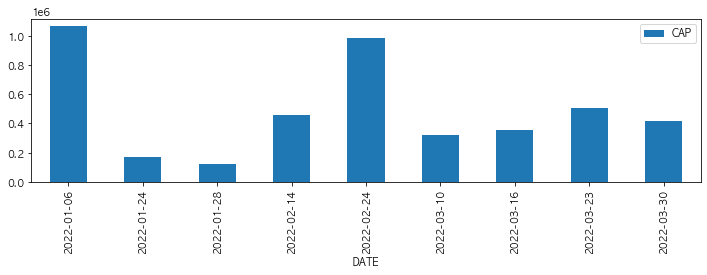

In [143]:
sell = position.loc[position.SELL == True].copy()
# tcknaming(sell)
# sell = sell[['DATE', 'TICKER', 'NAME', 'CAP', 'ACCOUNT']]

print('TOTAL SELL: ₩', f'{sell.CAP.sum():,}')

sellcap = sell[['DATE', 'CAP']].groupby(['DATE']).sum()
# sellcap.index = pd.to_datetime(sellcap.index)
sellcap.plot(kind= 'bar', figsize= (12, 3))

In [144]:
closed

,DATE,TICKER,NAME,BUY,SELL,DELTA,PROFIT%,STOCKS,CAP_CHANGE
0,2022-01-06,005930,삼성전자,79042,77500,-1542,-1.950862,-7,-10794
1,2022-01-06,035420,NAVER,378000,346000,-32000,-8.465608,-1,-32000
2,2022-01-06,069500,KODEX 200,40027,39435,-592,-1.479002,-2,-1184
3,2022-01-06,088980,맥쿼리인프라,14150,13800,-350,-2.473498,-7,-2450
4,2022-01-24,411420,KODEX 미국메타버스나스닥액티브,10150,8475,-1675,-16.502463,-20,-33500
5,2022-01-28,000660,SK하이닉스,128500,119500,-9000,-7.003891,-1,-9000
6,2022-02-14,133690,TIGER 미국나스닥100,85717,76300,-9417,-10.986152,-6,-56502
7,2022-02-24,510006,대신 인버스 니켈선물 ETN(H),3820,3360,-460,-12.041885,-53,-24380
8,2022-02-24,360750,TIGER 미국S&P500,14141,12535,-1606,-11.357047,-15,-24090
9,2022-02-24,133690,TIGER 미국나스닥100,85717,70930,-14787,-17.250954,-5,-73935


In [148]:
print('Total Closed Profit :  ₩' ,f'{closed.CAP_CHANGE.sum():,}')

Total Closed Profit :  ₩ -323,200


In [149]:
closed[['DATE', 'NAME', 'PROFIT%', 'CAP_CHANGE']].sort_values('CAP_CHANGE', ascending= False)

,DATE,NAME,PROFIT%,CAP_CHANGE
11,2022-03-10,KBSTAR 팔라듐선물(H),38.420182,88255
2,2022-01-06,KODEX 200,-1.479002,-1184
14,2022-03-23,TIGER 인버스,-2.553626,-2375
3,2022-01-06,맥쿼리인프라,-2.473498,-2450
15,2022-03-23,KODEX WTI원유선물인버스(H),-0.868790,-3666
5,2022-01-28,SK하이닉스,-7.003891,-9000
0,2022-01-06,삼성전자,-1.950862,-10794
13,2022-03-16,ARIRANG 신흥국MSCI(합성 H),-10.683567,-12980
8,2022-02-24,TIGER 미국S&P500,-11.357047,-24090
7,2022-02-24,대신 인버스 니켈선물 ETN(H),-12.041885,-24380


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


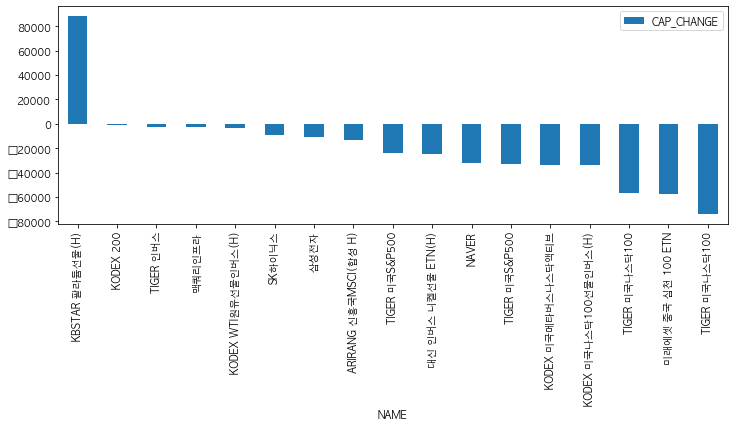

In [150]:
closed[['NAME', 'CAP_CHANGE']].set_index('NAME').sort_values('CAP_CHANGE', ascending= False).plot(kind= 'bar', figsize= (12, 4))

In [151]:
closed[['DATE', 'NAME', 'PROFIT%', 'CAP_CHANGE']].sort_values('PROFIT%', ascending= False)

,DATE,NAME,PROFIT%,CAP_CHANGE
11,2022-03-10,KBSTAR 팔라듐선물(H),38.420182,88255
15,2022-03-23,KODEX WTI원유선물인버스(H),-0.868790,-3666
2,2022-01-06,KODEX 200,-1.479002,-1184
0,2022-01-06,삼성전자,-1.950862,-10794
3,2022-01-06,맥쿼리인프라,-2.473498,-2450
14,2022-03-23,TIGER 인버스,-2.553626,-2375
5,2022-01-28,SK하이닉스,-7.003891,-9000
16,2022-03-30,KODEX 미국나스닥100선물인버스(H),-7.479964,-33600
1,2022-01-06,NAVER,-8.465608,-32000
13,2022-03-16,ARIRANG 신흥국MSCI(합성 H),-10.683567,-12980


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


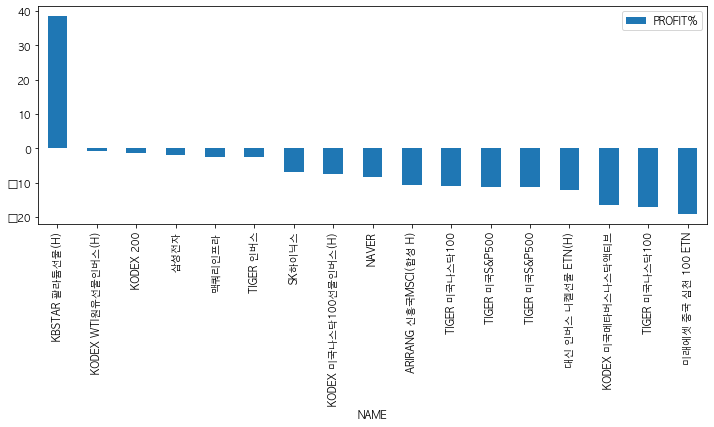

In [152]:
closed[['NAME', 'PROFIT%']].set_index('NAME').sort_values('PROFIT%', ascending= False).plot(kind= 'bar', figsize= (12, 4))

## Open Position Analysis

In [153]:
market = open.copy()
market

,TICKER,NAME,STOCKS,AVG_PRICE,INVEST
0,123310,TIGER 인버스,1,-4895.000000,-4.895000e+03
1,133690,TIGER 미국나스닥100,1,-82580.000000,-8.258000e+04
2,139280,TIGER 경기방어,99,-10130.000000,-1.002870e+06
3,157490,TIGER 소프트웨어,70,-14325.000000,-1.002750e+06
4,219390,KBSTAR 미국S&P원유생산기업(합성 H),180,-5545.000000,-9.981000e+05
5,266410,KODEX 필수소비재,127,-7910.000000,-1.004570e+06
6,271050,KODEX WTI원유선물인버스(H),18,-4489.732143,-8.081518e+04
7,319640,TIGER 골드선물(H),14,-14270.000000,-1.997800e+05
8,332610,ARIRANG 미국단기우량회사채,10,-102840.000000,-1.028400e+06
9,360750,TIGER 미국S&P500,18,-13670.000000,-2.460600e+05


In [154]:
marketprice = []

for tk in market.TICKER.to_list():
    tk_yahoo = yf.Ticker(tk + '.KS')
    data = tk_yahoo.history().tail(1)['Close'].iloc[0]
    marketprice.append(data)

# CV: 현재평가액 = 현재가 x 보유수, EVA: 평가증감 = 포지션 - 현재평가액
market['MARKET_PRICE'] = marketprice
market['CV'] = market.MARKET_PRICE * market.STOCKS
market['PROFIT'] = market.CV + market.INVEST
market['PROFIT%'] = market.PROFIT / market.INVEST * -100

market.sort_values(by=['PROFIT'], inplace= True, ignore_index=False,)
market

,TICKER,NAME,STOCKS,AVG_PRICE,INVEST,MARKET_PRICE,CV,PROFIT,PROFIT%
8,332610,ARIRANG 미국단기우량회사채,10,-102840.000000,-1.028400e+06,100150.0,1001500.0,-26900.000000,-2.615714
10,371450,TIGER 글로벌클라우드컴퓨팅INDXX,101,-9900.000000,-9.999000e+05,9680.0,977680.0,-22220.000000,-2.222222
13,394350,KOSEF 릭소글로벌퓨처모빌리티MSCI,91,-10984.000000,-9.995440e+05,10840.0,986440.0,-13104.000000,-1.310998
3,157490,TIGER 소프트웨어,70,-14325.000000,-1.002750e+06,14205.0,994350.0,-8400.000000,-0.837696
7,319640,TIGER 골드선물(H),14,-14270.000000,-1.997800e+05,13970.0,195580.0,-4200.000000,-2.102313
11,371460,TIGER 차이나전기차SOLACTIVE,68,-14720.000000,-1.000960e+06,14670.0,997560.0,-3400.000000,-0.339674
1,133690,TIGER 미국나스닥100,1,-82580.000000,-8.258000e+04,81245.0,81245.0,-1335.000000,-1.616614
14,409810,KODEX 미국나스닥100선물인버스(H),1,-11230.000000,-1.123000e+04,10595.0,10595.0,-635.000000,-5.654497
0,123310,TIGER 인버스,1,-4895.000000,-4.895000e+03,4775.0,4775.0,-120.000000,-2.451481
16,570049,TRUE S&P500 양매도 4% OTM ETN(H),42,-11696.785714,-4.912650e+05,11715.0,492030.0,765.000000,0.155720


In [155]:
market.sort_values(by=['PROFIT'], ascending= False, inplace= True)
market

,TICKER,NAME,STOCKS,AVG_PRICE,INVEST,MARKET_PRICE,CV,PROFIT,PROFIT%
4,219390,KBSTAR 미국S&P원유생산기업(합성 H),180,-5545.000000,-9.981000e+05,6040.0,1087200.0,89100.000000,8.926961
12,373790,KOSEF 미국방어배당성장나스닥,77,-12950.000000,-9.971500e+05,13305.0,1024485.0,27335.000000,2.741313
5,266410,KODEX 필수소비재,127,-7910.000000,-1.004570e+06,8115.0,1030605.0,26035.000000,2.591656
15,530020,삼성 미국 대형 가치주 ETN,16,-17668.625000,-2.826980e+05,18565.0,297040.0,14342.000000,5.073258
6,271050,KODEX WTI원유선물인버스(H),18,-4489.732143,-8.081518e+04,4870.0,87660.0,6844.821429,8.469723
9,360750,TIGER 미국S&P500,18,-13670.000000,-2.460600e+05,13930.0,250740.0,4680.000000,1.901975
2,139280,TIGER 경기방어,99,-10130.000000,-1.002870e+06,10170.0,1006830.0,3960.000000,0.394867
16,570049,TRUE S&P500 양매도 4% OTM ETN(H),42,-11696.785714,-4.912650e+05,11715.0,492030.0,765.000000,0.155720
0,123310,TIGER 인버스,1,-4895.000000,-4.895000e+03,4775.0,4775.0,-120.000000,-2.451481
14,409810,KODEX 미국나스닥100선물인버스(H),1,-11230.000000,-1.123000e+04,10595.0,10595.0,-635.000000,-5.654497


In [156]:
print('Portfolio Total Values: ₩', f'{int(market.CV.sum()):,}')
print('Portfolio Total Profit: ₩', f'{int(market.PROFIT.sum()):,}')
print('Portfolio Total Profit%: ', market.PROFIT.sum() / market.INVEST.sum() * 100, '%')


Portfolio Total Values: ₩ 10,526,315
Portfolio Total Profit: ₩ 92,747
Portfolio Total Profit%:  -0.8889368309149135 %
